In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

merged_data_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="left")

merged_data_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
merged_data_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged_data_no_dubs_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
merged_data_no_dubs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
merged_data_no_dubs_df['Mouse ID'].nunique()

249

In [5]:
tumor_volume_df = merged_data_no_dubs_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

Stats_df = tumor_volume_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean', 'median','var', 'std','sem'])
Stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

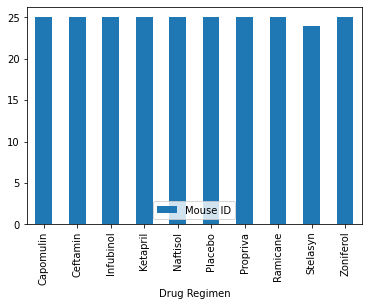

In [6]:
#Gets the total amount of mice including there drug treatment
mouse_count_w_drug_df = tumor_volume_df.drop_duplicates(subset=['Mouse ID'])
mouse_count_w_drug_df

#Counts drug use based on the dataframe above
drug_counts_df = mouse_count_w_drug_df.groupby(['Drug Regimen']).count()
counts_df = drug_counts_df.drop(columns='Tumor Volume (mm3)')

#This gets all the drug names into a list to use for the column names
drugs_name_list = tumor_volume_df['Drug Regimen'].tolist()
drugs_list_no_dups = list(dict.fromkeys(drugs_name_list))

counts_df.plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

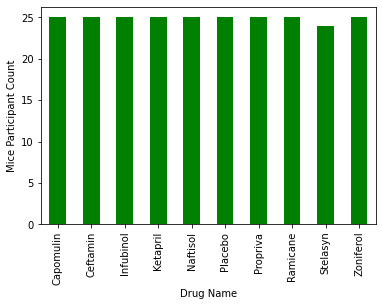

In [7]:
counts_df.plot(kind='bar', facecolor='green')
plt.ylabel("Mice Participant Count")
plt.xlabel("Drug Name")
plt.legend().remove()
plt.show

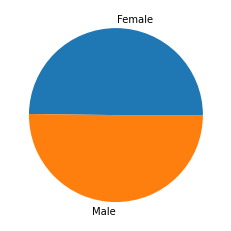

In [8]:
#Gets gender count
gender_counts_df = mouse_metadata_df.groupby(['Sex']).count()


# Cleans dataframe to have a single column
clean_gender_counts_df = gender_counts_df.drop(['Drug Regimen', 'Age_months', 'Weight (g)'], axis=1)
Gender_df = clean_gender_counts_df.rename(columns={"Mouse ID":""})

#creates py chart
plot = Gender_df.plot.pie(subplots=True)
plt.legend().remove()
plt.show()


C:\Users\TRedinger\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


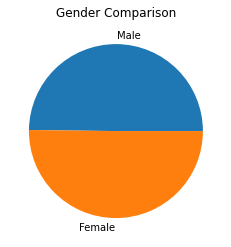

In [9]:
Gender_count_list = Gender_df.values.tolist()
Gender_list= ["Male", "Female"]

plt.pie(Gender_count_list, labels=Gender_list)
plt.title('Gender Comparison')
plt.show()

In [10]:
final_volume_df = tumor_volume_df.drop_duplicates(subset=['Mouse ID','Drug Regimen'], keep='last')
final_volume_df

top4_df = final_volume_df[final_volume_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

clean_top4_df = top4_df.rename(columns={"Drug Regimen": "Drug_Regimen"})
clean_top4_df


,Mouse ID,Drug_Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1797,x822,Ceftamin,61.386660
1813,y163,Infubinol,67.685569
1845,y769,Ceftamin,68.594745
1855,y865,Ceftamin,64.729837


In [11]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_list = clean_top4_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

low_outliers = []
high_outliers = []

#Capomulin
Capomulin_df = top4_df.loc[clean_top4_df.Drug_Regimen=='Capomulin',:]
Capomulin_data = Capomulin_df['Tumor Volume (mm3)'].tolist()

#Ramicane
Ramicane_df = top4_df.loc[clean_top4_df.Drug_Regimen=='Ramicane',:]
Ramicane_data = Ramicane_df['Tumor Volume (mm3)'].tolist()

#Infubinol
Infubinol_df = top4_df.loc[clean_top4_df.Drug_Regimen=='Infubinol',:]
Infubinol_data = Infubinol_df['Tumor Volume (mm3)'].tolist()

#Ceftamin
Ceftamin_df = top4_df.loc[clean_top4_df.Drug_Regimen=='Ceftamin',:]
Ceftamin_data = Ceftamin_df['Tumor Volume (mm3)'].tolist()
    
    # Determine outliers using upper and lower bounds
for data in tumor_vol_list:
    if data > upper_bound:
        low_outliers.append(data)
    elif data > upper_bound:
        high_outliers.append(data)  


<function matplotlib.pyplot.show(*args, **kw)>

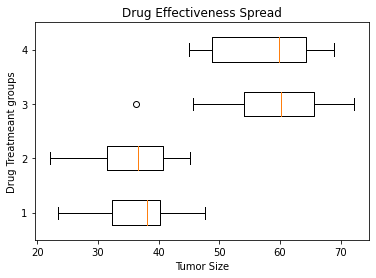

In [12]:
drug_data = [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data]
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Effectiveness Spread')
ax1.set_ylabel('Drug Treatmeant groups')
ax1.set_xlabel('Tumor Size')
ax1.boxplot(drug_data, vert=False)
plt.show


In [13]:
cfvd = merged_data_df.rename(columns={"Drug Regimen": "Drug_Regimen"})

Capomulin_df = cfvd.loc[cfvd.Drug_Regimen=='Capomulin',:]
Clean_Capomulin_df = Capomulin_df[["Mouse ID", "Drug_Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]

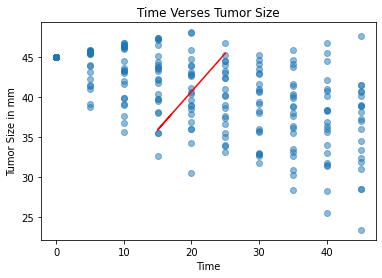

In [37]:
time =  Clean_Capomulin_df['Timepoint'].tolist()
size = Clean_Capomulin_df['Tumor Volume (mm3)'].tolist()

plt.scatter(time, size, alpha=.5)
plt.title("Time Verses Tumor Size")
plt.xlabel("Time")
plt.ylabel("Tumor Size in mm")
plt.plot(x_values,regress_values,"r-")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Clean_Capomulin_df['Weight (g)']
y_values = Clean_Capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.ylabel('Tumor Volume')
plt.xlabel('Mouse Weight')
plt.title('Mouse Weight VS Tumor Volume')